# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:

TOKEN_SPAM_PROB_FILE='SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE='SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE='SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX='SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE='SpamData/03_Testing/test-target.txt'

VOCAB_SIZE=2500

# Load the Data

In [3]:
X_test=np.loadtxt(TEST_FEATURE_MATRIX,delimiter=' ')
y_test=np.loadtxt(TEST_TARGET_FILE,delimiter=' ')
prob_token_spam=np.loadtxt(TOKEN_SPAM_PROB_FILE,delimiter=' ')
prob_token_ham=np.loadtxt(TOKEN_HAM_PROB_FILE,delimiter=' ')
prob_all_tokens=np.loadtxt(TOKEN_ALL_PROB_FILE,delimiter=' ')

# Calculate the joint probability

In [4]:
X_test.dot(prob_token_spam).shape

(1724,)

### Set the prior

In [5]:
PROB_SPAM=0.31113

In [6]:
np.log(prob_token_spam)

array([ -4.42105189,  -5.26513947,  -5.00014881, ..., -10.1608448 ,
       -11.41360777,  -9.6218483 ])

In [7]:
joint_log_spam=X_test.dot(np.log(prob_token_spam)-np.log(prob_all_tokens))+np.log(PROB_SPAM)

In [8]:
joint_log_spam[:5]

array([22.42364417,  1.97853165, 17.82891956, 16.80986334, 19.60317473])

In [9]:
joint_log_ham=X_test.dot(np.log(prob_token_ham)-np.log(prob_all_tokens))+np.log(1-PROB_SPAM)

In [10]:
joint_log_ham[:5]

array([-58.9920736 , -10.86575417, -34.76777607, -58.5930807 ,
       -53.13258963])

In [11]:
joint_log_spam.size

1724

# Making Predictions

In [39]:
prediciton=joint_log_spam>joint_log_ham

In [13]:
prediciton[-5:]

array([ True, False, False, False, False])

In [14]:
prediciton[:5]

array([ True,  True,  True,  True,  True])

In [15]:
y_test[:5]

array([1., 1., 1., 1., 1.])

# Metrics and Evaluation

In [16]:
correct_doc=(y_test==prediciton).sum()
print(correct_doc)

1685


In [17]:
numdocs_wrong=X_test.shape[0]-correct_doc
print(numdocs_wrong)

39


In [18]:
accuracy=correct_doc/len(X_test)
print(accuracy)

0.9773781902552204


# Simplification

In [43]:
joint_log_spam2=X_test.dot(np.log(prob_token_spam))+np.log(PROB_SPAM)
joint_log_ham2=X_test.dot(np.log(prob_token_ham))+np.log(1-PROB_SPAM)

In [44]:
prediciton2=joint_log_spam2>joint_log_ham2

In [45]:
correct_doc=(y_test==prediciton2).sum()
print(correct_doc)

1685


In [42]:
accuracy=correct_doc/len(X_test)
print(accuracy)

0.9773781902552204


# Visualising the Result

In [24]:
yaxis_label='P(X | Spam)'
xaxis_label='P(X | NonSpam)'

linedata=np.linspace(start=-2000,stop=500,num=500)

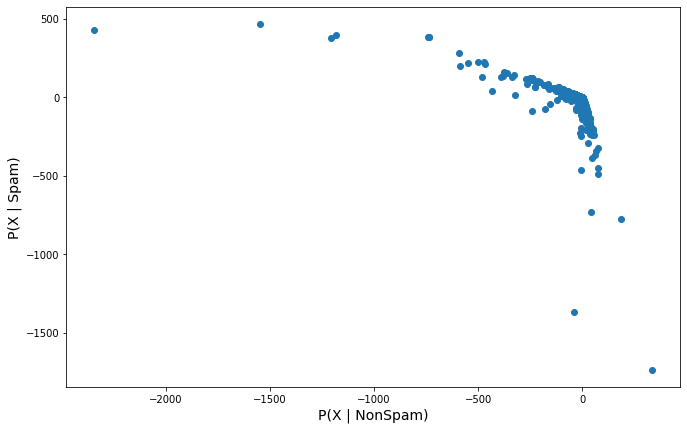

In [23]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)



plt.scatter(joint_log_ham,joint_log_spam)
plt.show()

## The Descision Boundary

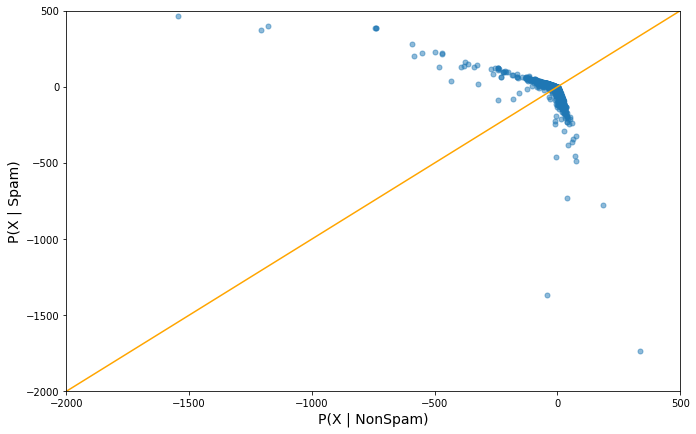

In [28]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)

plt.xlim([-2000,500])
plt.ylim([-2000,500])

plt.scatter(joint_log_ham,joint_log_spam,alpha=0.5,s=25)
plt.plot(linedata,linedata,color='orange')
plt.show()

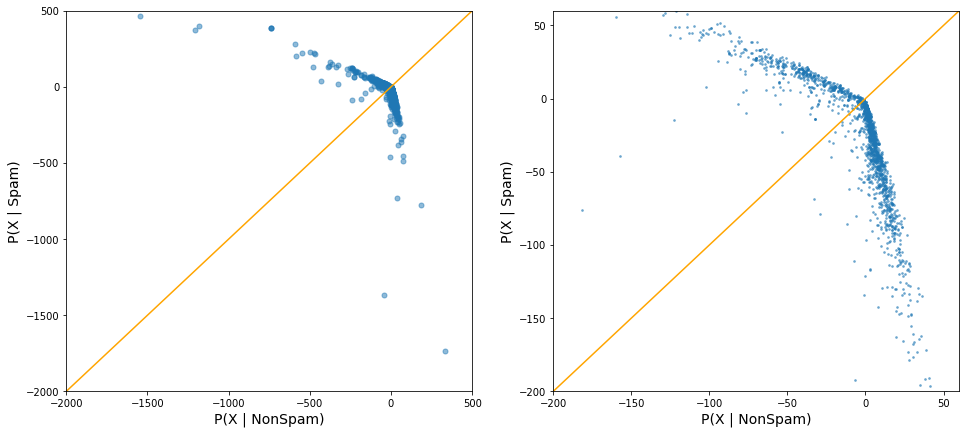

In [33]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)

plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)

plt.xlim([-2000,500])
plt.ylim([-2000,500])

plt.scatter(joint_log_ham,joint_log_spam,alpha=0.5,s=25)
plt.plot(linedata,linedata,color='orange')

plt.subplot(1,2,2)

plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)

plt.xlim([-200,60])
plt.ylim([-200,60])

plt.scatter(joint_log_ham,joint_log_spam,alpha=0.5,s=3)
plt.plot(linedata,linedata,color='orange')


plt.show()

In [34]:
sns.set_style('whitegrid')
labels='Actual Category'

summary_df=pd.DataFrame({yaxis_label:joint_log_spam,xaxis_label:joint_log_ham,labels:y_test})

C:\Users\Sushant Lenka\.conda\envs\machineLearning\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


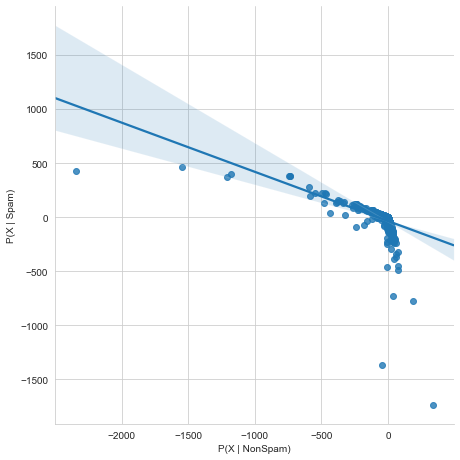

In [36]:
sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df,size=6.5)
plt.show()

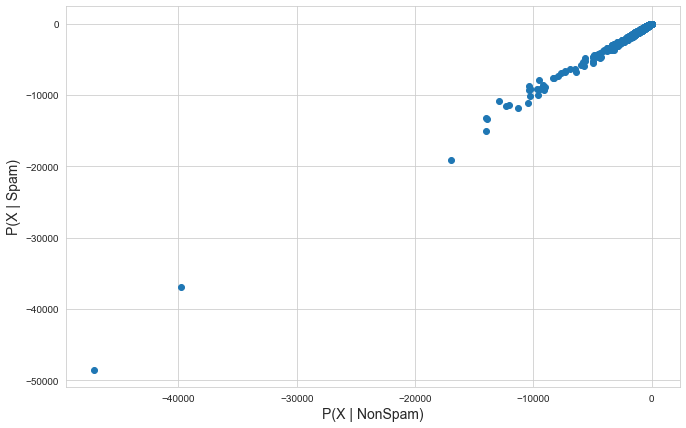

In [46]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)



plt.scatter(joint_log_ham2,joint_log_spam2)
plt.show()

In [52]:
sns.set_style('whitegrid')
labels='Actual Category'

summary_df=pd.DataFrame({yaxis_label:joint_log_spam2,xaxis_label:joint_log_ham2,labels:y_test})
linedata2=np.linspace(start=-14000,stop=1,num=1000)

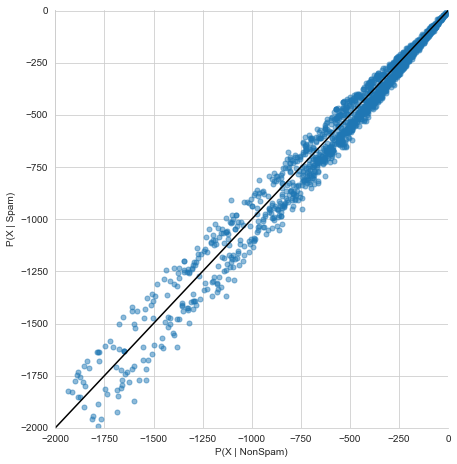

In [53]:
sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df,height=6.5,fit_reg=False,scatter_kws={'alpha':0.5,'s':25})
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(linedata,linedata,color='black')
plt.show()

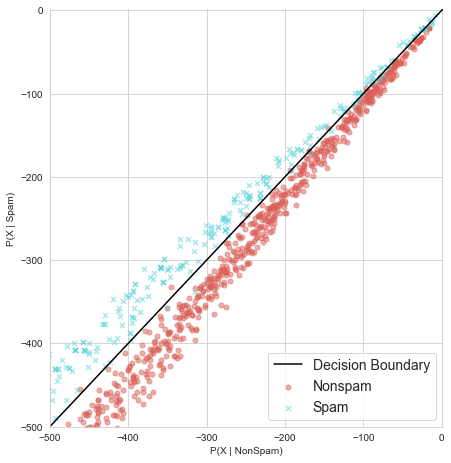

In [63]:
sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df,height=6.5,fit_reg=False,scatter_kws={'alpha':0.5,'s':25},hue=labels,
          markers=['o','x'],palette='hls',legend=False)
plt.xlim([-500,1])
plt.ylim([-500,1])

plt.plot(linedata,linedata,color='black')

plt.legend(('Decision Boundary','Nonspam','Spam'),loc='lower right',fontsize=14)
plt.show()

### False Positives and False Negatives

In [64]:
np.unique(prediciton,return_counts=True)

(array([False,  True]), array([1138,  586], dtype=int64))

In [65]:
true_pos=(y_test==1) & (prediciton==1)

In [66]:
true_pos.sum()

568

In [68]:
false_pos=(y_test==0) & (prediciton==1)

In [69]:
false_pos.sum()

18

In [70]:
false_neg=(y_test==1)&(prediciton==0)

In [71]:
false_neg.sum()

21

In [72]:
true_neg=(y_test==0)&(prediciton==0)

In [73]:
true_neg.sum()

1117

## The Recall Metric

In [75]:
recall_score=(true_pos.sum())/(true_pos.sum()+false_neg.sum())
print(recall_score)

0.9643463497453311


## The Precision Metric

In [76]:
precision_score=(true_pos.sum())/(true_pos.sum()+false_pos.sum())
print(precision_score)

0.9692832764505119


## The F1 Metric 

In [78]:
f1_score=(2*precision_score*recall_score)/(precision_score+recall_score)
print(f1_score)

0.9668085106382979
